## Sensitivity Analysis

Some experimentation with local and global sensitivity analysis based on the notebook provided by the course and some articles

#### References
- Broeke, G. ten, Voorn, G. van, Ligtenberg, A. (2016). Which Sensitivity Analysis Method Should I Use for My Agent-Based Model?



### OFAT
One-Factor-At-a-Time: Method of local sensitivity analysis, where one input parameter is varied and the others are kept fixed. According to ten Broeke (2016) a pre-test needs to be done to ensure a the model converges to a steady state behaviour. This might prove problematic for our model, since we examine early stage colonies, and in the results from the ODE model, the ant and fungus biomass are still increasing vastly. 

In [1]:
from leafcutter_ants_fungi_mutualism.model import LeafcutterAntsFungiMutualismModel, track_ants
from mesa.batchrunner import BatchRunner, BatchRunnerMP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
"""
Pre-test to determine whether the model converges to a steady state behaviour
"""
model = LeafcutterAntsFungiMutualismModel(num_ants=50, num_plants=30, width=20, height=50,
                 pheromone_lifespan=30, num_plant_leaves=100,
                 leaf_regrowth_rate=1/2, ant_death_probability=0.01,
                 initial_fungus_energy=50, fungus_decay_rate=1/50)

repetitions = 100
time_steps = 100

output_variables = {"Ants_Biomass": track_ants,
                    "Fungus_Biomass": lambda m: m.fungi[0].biomass}

variable_parameters = {'num_ants': [20,50]}

# batch = BatchRunner(LeafcutterAntsFungiMutualismModel,
#                     max_steps = time_steps, 
#                     variable_parameters = variable_parameters,
#                     iterations = repetitions,
#                     model_reporters = output_variables,
#                     display_progress = True)

batch = BatchRunnerMP(LeafcutterAntsFungiMutualismModel, nr_processes = 8,
                    max_steps = time_steps, 
                    variable_parameters = variable_parameters,
                    iterations = repetitions,
                    model_reporters = output_variables,
                    display_progress = True)

batch.run_all()

data = batch.get_model_vars_dataframe()

print(data)

200it [01:17,  2.59it/s]

     num_ants  Run  Ants_Biomass  Fungus_Biomass
1          20    0           434      104.052832
102        50    0           864      147.939582
4          20    1           689      145.616772
100        50    1           594       88.554807
3          20    2           610      128.786873
..        ...  ...           ...             ...
98         20   97           698      162.802445
97         20   98           535      102.276678
198        50   98           731      162.201195
99         20   99           615       99.116235
199        50   99           773      117.161002

[200 rows x 4 columns]


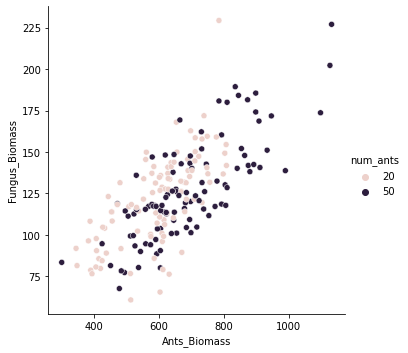

In [6]:
#data_collection = batch.get_collector_model()
sns.relplot(data=data, x='Ants_Biomass', y='Fungus_Biomass', hue='num_ants')

In [18]:
data_collection = batch.get_collector_model()
# print(data_collection.keys())

# every key - value pair (nr_ants, repetition_number) contains a single model run
print(data_collection[(20,20)])

     Fungus Biomass  Ant Biomass  Ants with Leaves
0         50.000000           20                 0
1         50.000000           20                 0
2         94.100000           25                 0
3         83.218000           34                 3
4         73.713640           42                 6
..              ...          ...               ...
96        93.469762          560               178
97        92.780367          563               184
98        86.104759          567               188
99        92.542664          568               192
100       92.691811          574               200

[101 rows x 3 columns]


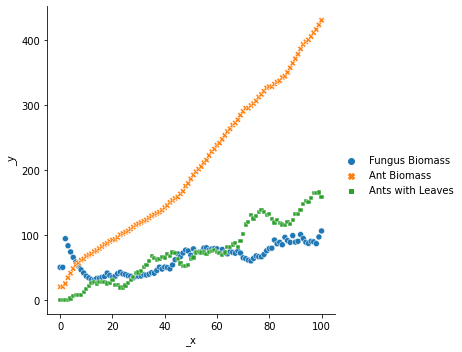

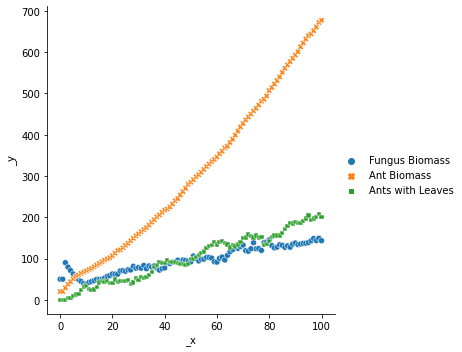

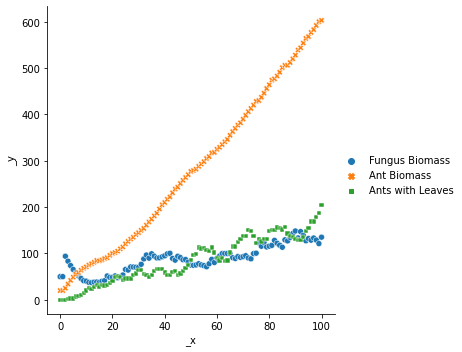

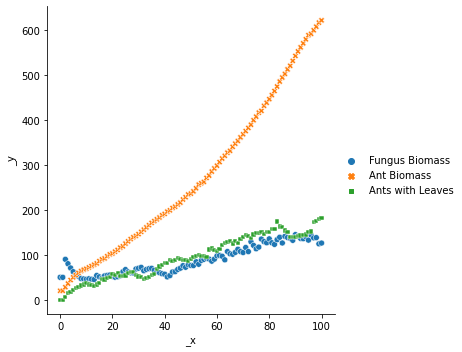

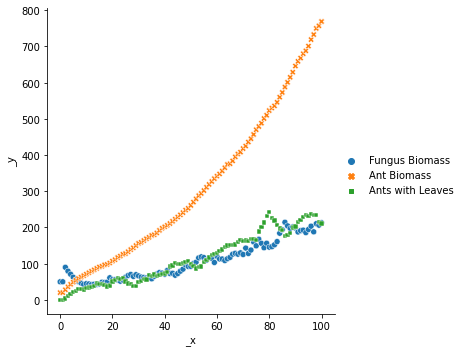

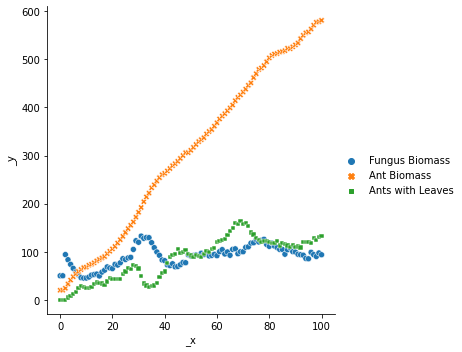

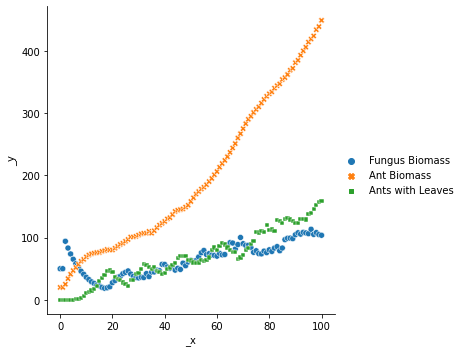

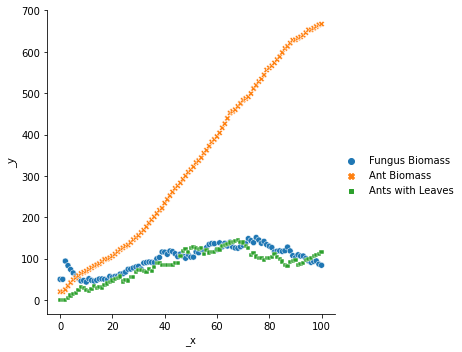

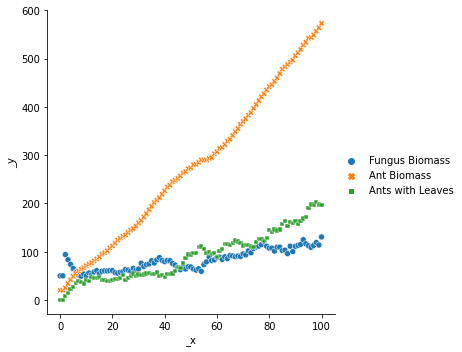

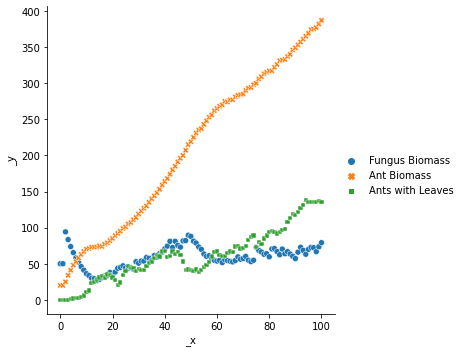

In [20]:
for i in range(10):
    sns.relplot(data=data_collection[(20,i)])